In [1]:
"""
En este notebook creamos una funcion que crea un scatter plot con 5 variables o dimenciones y una de ellas es el color.
Shape + Size + Color

IMPORTANTE: Para esta funcion es iportante notar que hay dos iteradores paar crear los retalles de grafico.
uno es por forma y el otro por color.
"""

'\nEn este notebook creamos una funcion que crea un scatter plot con 5 variables o dimenciones y una de ellas es el color.\nShape + Size + Color\n'

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [5]:
url = 'Automobile price data _Raw_.csv'
data = pd.read_csv(url)
data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [12]:
## creamos unas funcion para limpiar los datos.

def limpia_datos(data):
    import numpy as np
    import pandas as pd
    
    columnas = data.columns
    data.columns = [str.replace('-','_') for str in columnas]
    
    columnas = ['price', 'bore', 'stroke', 
          'horsepower', 'peak_rpm']
    
    for col in columnas:
        data.loc[data[col]=='?',col]=np.nan
        data[col].dropna(axis=0, inplace=True)
        
    for col in columnas:
        data[col] = pd.to_numeric(data[col])
        
    return data       

In [13]:
limpia_datos(data)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22,NaN


In [57]:
##creamos una funcion para graficar un scatter plot en 5 dimensiones. con shape + size + color.

def crea_scatterplot_5D(dataset, x_col, y_col='price', shape_col = 'fuel_type', 
                        size_col = 'curb_weight', normalizador = 0.000005,color_col = 'aspiration',alpha= 0.4):
    shape = ['+','*']
    color = ['green','blue','orange','magenta']
    
    unique_cat = dataset[shape_col].unique()
    unique_color = dataset[color_col].unique()
    
    for col in x_col:
        sea.set_style('whitegrid')
        for idx_cat, cat in enumerate(unique_cat):
            for idx_color, color_r in enumerate(unique_color):
                temp = dataset[(dataset[shape_col]==cat) & (dataset[color_col]==color_r)]
                sea.regplot(col, y_col, data = temp, marker = shape[idx_cat], label = (cat + ' ' + color_r),
                scatter_kws={'alpha':alpha, 's':normalizador*temp[size_col]**2}, fit_reg = False, color = color[idx_color])
        plt.title('Scatter X:' + col + ' Y: ' + y_col + ' con color')
        plt.legend()
        plt.xlabel(col)
        plt.ylabel(y_col)
        plt.show()

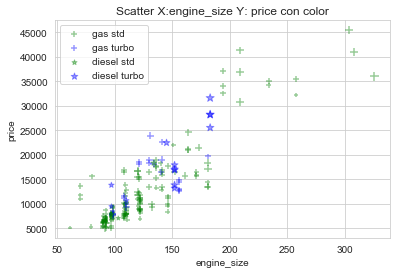

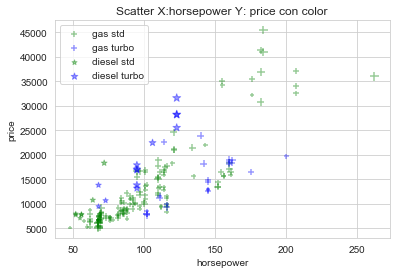

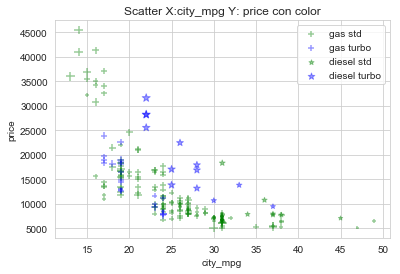

In [58]:
columns =[ 'engine_size', 'horsepower', 'city_mpg']
crea_scatterplot_5D(data,columns)